# Airbnb Text Classification

Machine Learning 2 Final Project

Team 6: Mild Trakarnsakdikul, Zayn Sui, Sylvie Zhou, Joy Zhu, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Text Preprocessing 

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML2textdata.csv")

In [ ]:
df.head()

,id,host_id,name,description,neighborhood_overview,host_about,host_is_superhost,target
0,8357,24281,The Mushroom Dome Retreat & LAND of Paradise S...,"Next available day is Aug. 28th, Next weekend:...",Even though we live only a 8 minute drive to A...,"We live on 10 beautiful acres of sun, oak fore...",t,1
1,11869,44764,Cottage by the Redwoods,This is a very private cute cozy small bohemia...,This is a quiet neighborhood with no street li...,"Easygoing, environmentalist, musician/educator...",f,0
2,11879,44764,Sunny room close to beach and parks,Sunny room in a cozy home with a 40 acre park ...,NaN,"Easygoing, environmentalist, musician/educator...",f,0
3,24548,99532,Room with Private Entrance.,Bedroom and bath with private entrance in my h...,Great location close to Santa Cruz Harbor and ...,Easy going and friendly I like to think.\n\nI ...,t,1
4,31721,136376,Private Pleasure Point Beach Cottage w/hottub,*LOCATION LOCATION LOCATION* <br />Welcome to ...,I love everything about this neighborhood. I ...,Hey Airbnb folks thanks for taking the time to...,f,0


In [ ]:
#change t and f to binary target variable
df['target'] = df['host_is_superhost'].map({'t':1,'f':0,np.nan:0})

In [ ]:
df['target'].value_counts()

0    85793
1    45595
Name: target, dtype: int64

In [ ]:
df = df.drop('host_is_superhost', axis=1)

In [ ]:
#change all the nan into space
df.fillna(value=' ', inplace=True)

In [ ]:
df['alltext'] = df['name'] + ' ' + df['description'] + ' ' + df['neighborhood_overview'] + ' ' + df['host_about']

In [ ]:
df['alltext']

0         The Mushroom Dome Retreat & LAND of Paradise S...
1         Cottage by the Redwoods This is a very private...
2         Sunny room close to beach and parks Sunny room...
3         Room with Private Entrance. Bedroom and bath w...
4         Private Pleasure Point Beach Cottage w/hottub ...
                                ...                        
131383    Quiet 2BR Townhouse in Bustling Eastlake This ...
131384    Peaceful Home! Great Location! Amazing locatio...
131385    Home away from home Walking distance from Star...
131386    Kirkland placid community Have a Relax And qui...
131387    Alki Beach 1-Bedroom Cozy Retreat Charming wat...
Name: alltext, Length: 131388, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131388 entries, 0 to 131387
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     131388 non-null  object
 1   host_id                131388 non-null  object
 2   name                   131388 non-null  object
 3   description            131388 non-null  object
 4   neighborhood_overview  131388 non-null  object
 5   host_about             131388 non-null  object
 6   target                 131388 non-null  int64 
 7   alltext                131388 non-null  object
dtypes: int64(1), object(7)
memory usage: 8.0+ MB


### Normalizing Text 

In [ ]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

import regex as re

#### Removing non letters

In [ ]:
example = df.alltext[0]

In [ ]:
#removing numbers, symbols and non letters
letters_only = re.sub("[^a-zA-Z]", " ", example)
letters_only

'The Mushroom Dome Retreat   LAND of Paradise Suite Next available day is Aug    th  Next weekend  Nov  br   We have been listing the Mushroom Dome Cabin with airbnb since July     and have had the most reservations of any of their listings  There is a reason we are so popular  the cabin is near a Redwood Grove  at night  there is hardly any sound here   maybe  crickets  It is a Paradise here  a great place to unwind   restore  br   When you make your request to stay  please tell us how you are handling the Covid    pandemic  br    br    b The space  b  br   As we are no longer allowed by Santa Cruz county to rent the Mushroom Dome Cabin  we are now listing the LAND of Paradise Suite  a room in our unique home   LAND  Love And Nature Divine  Make a reservation for the Suite and you will have unlimited access to the Mushroom Dome Retreat  br   We have    acres next to land without fences so you will get to enjoy nature  just hang out on the deck  take a hike in the woods  watch the humm

In [ ]:
lowercase = letters_only.lower().split()
lowercase

['the',
 'mushroom',
 'dome',
 'retreat',
 'land',
 'of',
 'paradise',
 'suite',
 'next',
 'available',
 'day',
 'is',
 'aug',
 'th',
 'next',
 'weekend',
 'nov',
 'br',
 'we',
 'have',
 'been',
 'listing',
 'the',
 'mushroom',
 'dome',
 'cabin',
 'with',
 'airbnb',
 'since',
 'july',
 'and',
 'have',
 'had',
 'the',
 'most',
 'reservations',
 'of',
 'any',
 'of',
 'their',
 'listings',
 'there',
 'is',
 'a',
 'reason',
 'we',
 'are',
 'so',
 'popular',
 'the',
 'cabin',
 'is',
 'near',
 'a',
 'redwood',
 'grove',
 'at',
 'night',
 'there',
 'is',
 'hardly',
 'any',
 'sound',
 'here',
 'maybe',
 'crickets',
 'it',
 'is',
 'a',
 'paradise',
 'here',
 'a',
 'great',
 'place',
 'to',
 'unwind',
 'restore',
 'br',
 'when',
 'you',
 'make',
 'your',
 'request',
 'to',
 'stay',
 'please',
 'tell',
 'us',
 'how',
 'you',
 'are',
 'handling',
 'the',
 'covid',
 'pandemic',
 'br',
 'br',
 'b',
 'the',
 'space',
 'b',
 'br',
 'as',
 'we',
 'are',
 'no',
 'longer',
 'allowed',
 'by',
 'santa',
 '

#### Stop Words
Some words in the English language, while necessary, don't contribute much to the meaning of a phrase. These words, such as "when", "had", "those" or "before", are called stop words and should be filtered out.

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
words = [w for w in lowercase if not w in stop_words]
words

['mushroom',
 'dome',
 'retreat',
 'land',
 'paradise',
 'suite',
 'next',
 'available',
 'day',
 'aug',
 'th',
 'next',
 'weekend',
 'nov',
 'br',
 'listing',
 'mushroom',
 'dome',
 'cabin',
 'airbnb',
 'since',
 'july',
 'reservations',
 'listings',
 'reason',
 'popular',
 'cabin',
 'near',
 'redwood',
 'grove',
 'night',
 'hardly',
 'sound',
 'maybe',
 'crickets',
 'paradise',
 'great',
 'place',
 'unwind',
 'restore',
 'br',
 'make',
 'request',
 'stay',
 'please',
 'tell',
 'us',
 'handling',
 'covid',
 'pandemic',
 'br',
 'br',
 'b',
 'space',
 'b',
 'br',
 'longer',
 'allowed',
 'santa',
 'cruz',
 'county',
 'rent',
 'mushroom',
 'dome',
 'cabin',
 'listing',
 'land',
 'paradise',
 'suite',
 'room',
 'unique',
 'home',
 'land',
 'love',
 'nature',
 'divine',
 'make',
 'reservation',
 'suite',
 'unlimited',
 'access',
 'mushroom',
 'dome',
 'retreat',
 'br',
 'acres',
 'next',
 'land',
 'without',
 'fences',
 'get',
 'enjoy',
 'nature',
 'hang',
 'deck',
 'take',
 'hike',
 'woods

#### Stemming, Tolkenizing and Lemmatizing

The three method allow me to clean and separate wods to their stem, root and individual words. I will be exploring what each process do to the sample text.



In [ ]:
porter = PorterStemmer()
ps = [porter.stem(i) for i in words]
ps

['mushroom',
 'dome',
 'retreat',
 'land',
 'paradis',
 'suit',
 'next',
 'avail',
 'day',
 'aug',
 'th',
 'next',
 'weekend',
 'nov',
 'br',
 'list',
 'mushroom',
 'dome',
 'cabin',
 'airbnb',
 'sinc',
 'juli',
 'reserv',
 'list',
 'reason',
 'popular',
 'cabin',
 'near',
 'redwood',
 'grove',
 'night',
 'hardli',
 'sound',
 'mayb',
 'cricket',
 'paradis',
 'great',
 'place',
 'unwind',
 'restor',
 'br',
 'make',
 'request',
 'stay',
 'pleas',
 'tell',
 'us',
 'handl',
 'covid',
 'pandem',
 'br',
 'br',
 'b',
 'space',
 'b',
 'br',
 'longer',
 'allow',
 'santa',
 'cruz',
 'counti',
 'rent',
 'mushroom',
 'dome',
 'cabin',
 'list',
 'land',
 'paradis',
 'suit',
 'room',
 'uniqu',
 'home',
 'land',
 'love',
 'natur',
 'divin',
 'make',
 'reserv',
 'suit',
 'unlimit',
 'access',
 'mushroom',
 'dome',
 'retreat',
 'br',
 'acr',
 'next',
 'land',
 'without',
 'fenc',
 'get',
 'enjoy',
 'natur',
 'hang',
 'deck',
 'take',
 'hike',
 'wood',
 'watch',
 'hummingbird',
 'deck',
 'go',
 'beach',

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(example)
tokens

['The',
 'Mushroom',
 'Dome',
 'Retreat',
 'LAND',
 'of',
 'Paradise',
 'Suite',
 'Next',
 'available',
 'day',
 'is',
 'Aug',
 '28th',
 'Next',
 'weekend',
 'Nov',
 'br',
 'We',
 'have',
 'been',
 'listing',
 'the',
 'Mushroom',
 'Dome',
 'Cabin',
 'with',
 'airbnb',
 'since',
 'July',
 '09',
 'and',
 'have',
 'had',
 'the',
 'most',
 'reservations',
 'of',
 'any',
 'of',
 'their',
 'listings',
 'There',
 'is',
 'a',
 'reason',
 'we',
 'are',
 'so',
 'popular',
 'the',
 'cabin',
 'is',
 'near',
 'a',
 'Redwood',
 'Grove',
 'at',
 'night',
 'there',
 'is',
 'hardly',
 'any',
 'sound',
 'here',
 'maybe',
 'crickets',
 'It',
 'is',
 'a',
 'Paradise',
 'here',
 'a',
 'great',
 'place',
 'to',
 'unwind',
 'restore',
 'br',
 'When',
 'you',
 'make',
 'your',
 'request',
 'to',
 'stay',
 'please',
 'tell',
 'us',
 'how',
 'you',
 'are',
 'handling',
 'the',
 'Covid',
 '19',
 'pandemic',
 'br',
 'br',
 'b',
 'The',
 'space',
 'b',
 'br',
 'As',
 'we',
 'are',
 'no',
 'longer',
 'allowed',
 'b

In [ ]:
lemmatizer = WordNetLemmatizer()
lem = [lemmatizer.lemmatize(i) for i in words]
lem

['mushroom',
 'dome',
 'retreat',
 'land',
 'paradise',
 'suite',
 'next',
 'available',
 'day',
 'aug',
 'th',
 'next',
 'weekend',
 'nov',
 'br',
 'listing',
 'mushroom',
 'dome',
 'cabin',
 'airbnb',
 'since',
 'july',
 'reservation',
 'listing',
 'reason',
 'popular',
 'cabin',
 'near',
 'redwood',
 'grove',
 'night',
 'hardly',
 'sound',
 'maybe',
 'cricket',
 'paradise',
 'great',
 'place',
 'unwind',
 'restore',
 'br',
 'make',
 'request',
 'stay',
 'please',
 'tell',
 'u',
 'handling',
 'covid',
 'pandemic',
 'br',
 'br',
 'b',
 'space',
 'b',
 'br',
 'longer',
 'allowed',
 'santa',
 'cruz',
 'county',
 'rent',
 'mushroom',
 'dome',
 'cabin',
 'listing',
 'land',
 'paradise',
 'suite',
 'room',
 'unique',
 'home',
 'land',
 'love',
 'nature',
 'divine',
 'make',
 'reservation',
 'suite',
 'unlimited',
 'access',
 'mushroom',
 'dome',
 'retreat',
 'br',
 'acre',
 'next',
 'land',
 'without',
 'fence',
 'get',
 'enjoy',
 'nature',
 'hang',
 'deck',
 'take',
 'hike',
 'wood',
 'wa

#### Clean Text Function

Stemming seem to work best as it shorten the words to their stem which will give al the text we are analyzing an equal weight,while lemmatizing spilt all the words we achieve that by doin the .split fucntion.

In [ ]:
def text_to_words(raw_text):
    # 1. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text) #removing all non letters

    # 2. Convert to lower case, split into individual words.
    lowercase = letters_only.lower().split()
    
    # 3. Remove stopwords.
    stop_words = nltk.corpus.stopwords.words('english')   
    words = [w for w in lowercase if not w in stop_words]
    
    # 4. Stemming
    porter = PorterStemmer()
    ps = [porter.stem(i) for i in words]
    
    # 5. Join the words back into one string separated by space, 
    return(" ".join(ps))

In [ ]:
example = df.alltext[1]

In [ ]:
#test clean text with example
print('original text:',example)
print('clean text:',text_to_words(example))

original text: Cottage by the Redwoods This is a very private cute cozy small bohemian style retreat next to a creek under the redwood and oak trees. Across the street is a 40 acre park for hiking biking walking frisbee etc. including a dog park<br /><br /><b>The space</b><br />Lovely private setting by the creek, across the street from 40 acre park with trails and playing fields, beach easy walk or bike ride away, shops, restaurants and theater nearby. no traffic very peaceful.<br /><br /><b>Guest access</b><br />There is ample parking in front of the orchard. Bus stop to Santa Cruz or Capitola etc. is a five minute walk down the street.<br /><br /><b>Other things to note</b><br />Recycling and composting as well as minimal use of plastics Are greatly appreciated! This is a quiet neighborhood with no street lights and no sidewalks. It’s near the end of the road so there’s very little traffic. Yet it’s just a minute from the freeway and health food stores and restaurants are all just m

#### Clean Text

In [ ]:
clean_text=[]

for text in df['alltext']:
    clean_text.append(text_to_words(text))

In [ ]:
df['cleantext'] = clean_text

In [ ]:
#removing br
remove_br=[]

for text in df['cleantext']:
  br = ["br", "b", "br ", " br"]
  for word in br:
    text = text.replace(word, "")
  remove_br.append(text)

In [ ]:
df['no_br'] = remove_br

In [ ]:
df.head()

,id,host_id,name,description,neighborhood_overview,host_about,target,alltext,cleantext,no_br
0,8357,24281,The Mushroom Dome Retreat & LAND of Paradise S...,"Next available day is Aug. 28th, Next weekend:...",Even though we live only a 8 minute drive to A...,"We live on 10 beautiful acres of sun, oak fore...",1,The Mushroom Dome Retreat & LAND of Paradise S...,mushroom dome retreat land paradis suit next a...,mushroom dome retreat land paradis suit next a...
1,11869,44764,Cottage by the Redwoods,This is a very private cute cozy small bohemia...,This is a quiet neighborhood with no street li...,"Easygoing, environmentalist, musician/educator...",0,Cottage by the Redwoods This is a very private...,cottag redwood privat cute cozi small bohemian...,cottag redwood privat cute cozi small ohemian ...
2,11879,44764,Sunny room close to beach and parks,Sunny room in a cozy home with a 40 acre park ...,,"Easygoing, environmentalist, musician/educator...",0,Sunny room close to beach and parks Sunny room...,sunni room close beach park sunni room cozi ho...,sunni room close each park sunni room cozi hom...
3,24548,99532,Room with Private Entrance.,Bedroom and bath with private entrance in my h...,Great location close to Santa Cruz Harbor and ...,Easy going and friendly I like to think.\n\nI ...,1,Room with Private Entrance. Bedroom and bath w...,room privat entranc bedroom bath privat entran...,room privat entranc edroom ath privat entranc ...
4,31721,136376,Private Pleasure Point Beach Cottage w/hottub,*LOCATION LOCATION LOCATION* <br />Welcome to ...,I love everything about this neighborhood. I ...,Hey Airbnb folks thanks for taking the time to...,0,Private Pleasure Point Beach Cottage w/hottub ...,privat pleasur point beach cottag w hottub loc...,privat pleasur point each cottag w hottu locat...


In [ ]:
#save data to drive
df.to_csv('/content/drive/My Drive/ML2cleantext.csv', index=False)

## Text EDA and Visualization

In [ ]:
df = pd.read_csv("/content/drive/My Drive/FOCUS Team/0. Spring Classes/Machine Learning 2/ML2cleantext.csv")

<ipython-input-2-217c963225e1>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/FOCUS Team/0. Spring Classes/Machine Learning 2/ML2cleantext.csv")


In [ ]:
df = df.dropna()

#### Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def draw_wordcloud(data, plot_title=None):
    wordcloud = WordCloud(
        scale=7,
        max_words=200,
        stopwords=stopwords,
        width = 800,
        height = 800,
        background_color='white',
        colormap='RdPu',
        contour_width=3,
        contour_color='coral').generate(''.join(data))
    
    plt.figure(figsize=(16,10), facecolor='white')
    plt.imshow(wordcloud)
    plt.title(plot_title, fontsize=20, pad=50)
    plt.axis("off")
    plt.show()

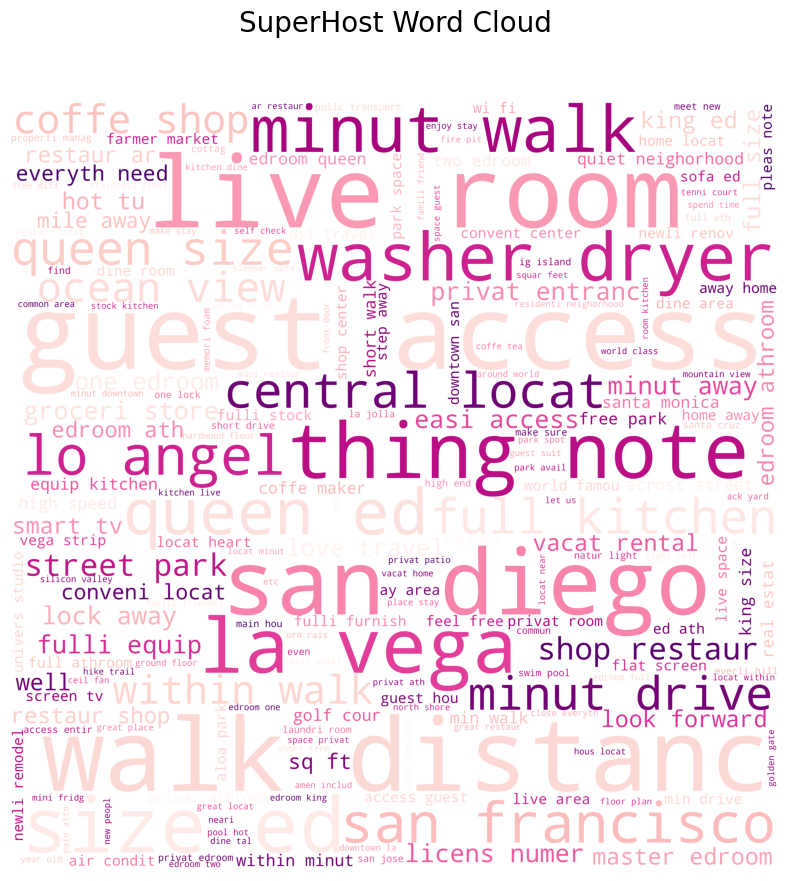

In [ ]:
draw_wordcloud(df[df.target==1].no_br, "SuperHost Word Cloud")

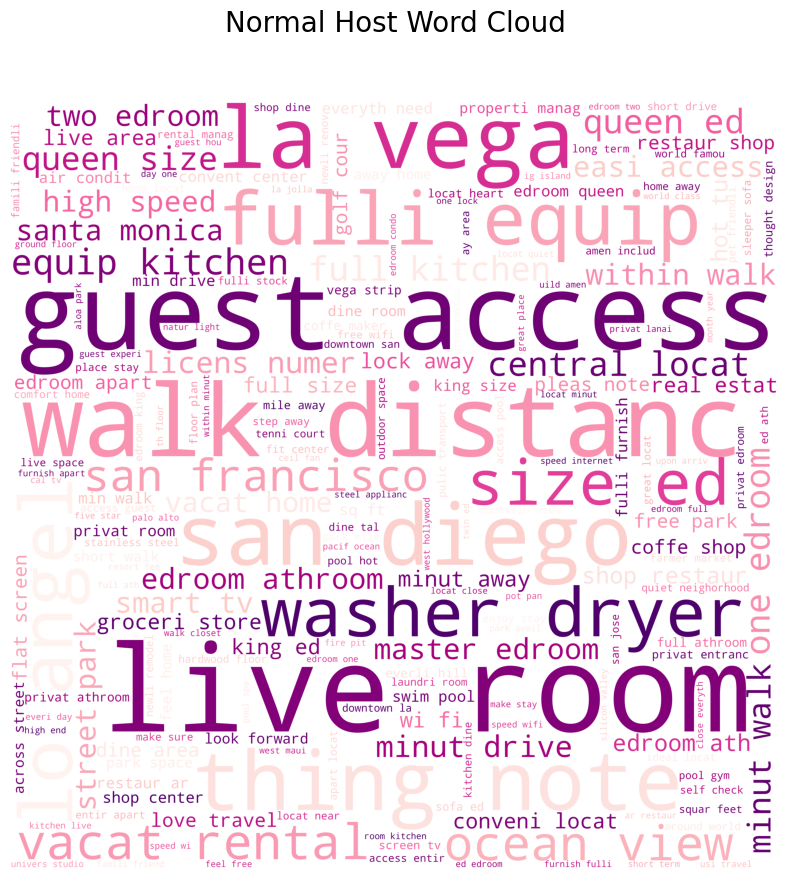

In [ ]:
draw_wordcloud(df[df.target==0].no_br, "Normal Host Word Cloud")

#### Word Count

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvec = CountVectorizer(stop_words='english')

tvec = TfidfVectorizer(stop_words='english')

In [ ]:
#superhost cvec count
cvec_sh = cvec.fit_transform(df[df.target==1].no_br)
cvec_sh_df = pd.DataFrame(cvec_sh.todense(),columns=cvec.get_feature_names_out())
cvec_sh_count = cvec_sh_df.sum(axis=0)
cvec_sh_count.sort_values(ascending=False).head(10)

home      66076
space     62935
guest     55454
park      54982
locat     51332
walk      48209
room      46792
edroom    46784
privat    43562
live      43101
dtype: int64

In [ ]:
cvec_sh_count_df = cvec_sh_count.sort_values(ascending=False).head(10)

In [ ]:
#superhost tvec count
tvec_sh = tvec.fit_transform(df[df.target==1].no_br)
tvec_sh_df = pd.DataFrame(tvec_sh.todense(),columns=tvec.get_feature_names_out())
tvec_sh_count = tvec_sh_df.sum(axis=0)
tvec_sh_count.sort_values(ascending=False).head(10)

home      1840.568556
park      1547.330646
room      1502.964659
guest     1496.713286
edroom    1458.818633
privat    1388.923390
locat     1382.391850
hous      1349.780526
space     1331.404843
walk      1326.827879
dtype: float64

In [ ]:
tvec_sh_count_df = tvec_sh_count.sort_values(ascending=False).head(10)

In [ ]:
#normal host cvec count
cvec_h = cvec.fit_transform(df[df.target==0].no_br)
cvec_h_df = pd.DataFrame(cvec_h.todense(),columns=cvec.get_feature_names_out())
cvec_h_count = cvec_h_df.sum(axis=0)
cvec_h_count.sort_values(ascending=False).head(10)

In [ ]:
cvec_h_count_df = cvec_h_count.sort_values(ascending=False).head(10)

In [ ]:
#normal host tvec count
tvec_h = tvec.fit_transform(df[df.target==0].no_br)
tvec_h_df = pd.DataFrame(tvec_h.todense(),columns=tvec.get_feature_names_out())
tvec_h_count = tvec_sh_df.sum(axis=0)
tvec_h_count.sort_values(ascending=False).head(10)

In [ ]:
tvec_h_count_df = tvec_h_count.sort_values(ascending=False).head(10)

In [ ]:
def word_count(data,title):
    plt.figure(figsize=(22,16), facecolor='white')

    data.sort_values().tail(10).plot(kind='barh', color='lightcoral')
    plt.title(title, fontsize=30)
    plt.xlabel('Count',fontsize=20)
    plt.ylabel('Word',fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18, length=10, width=2)
    plt.show()

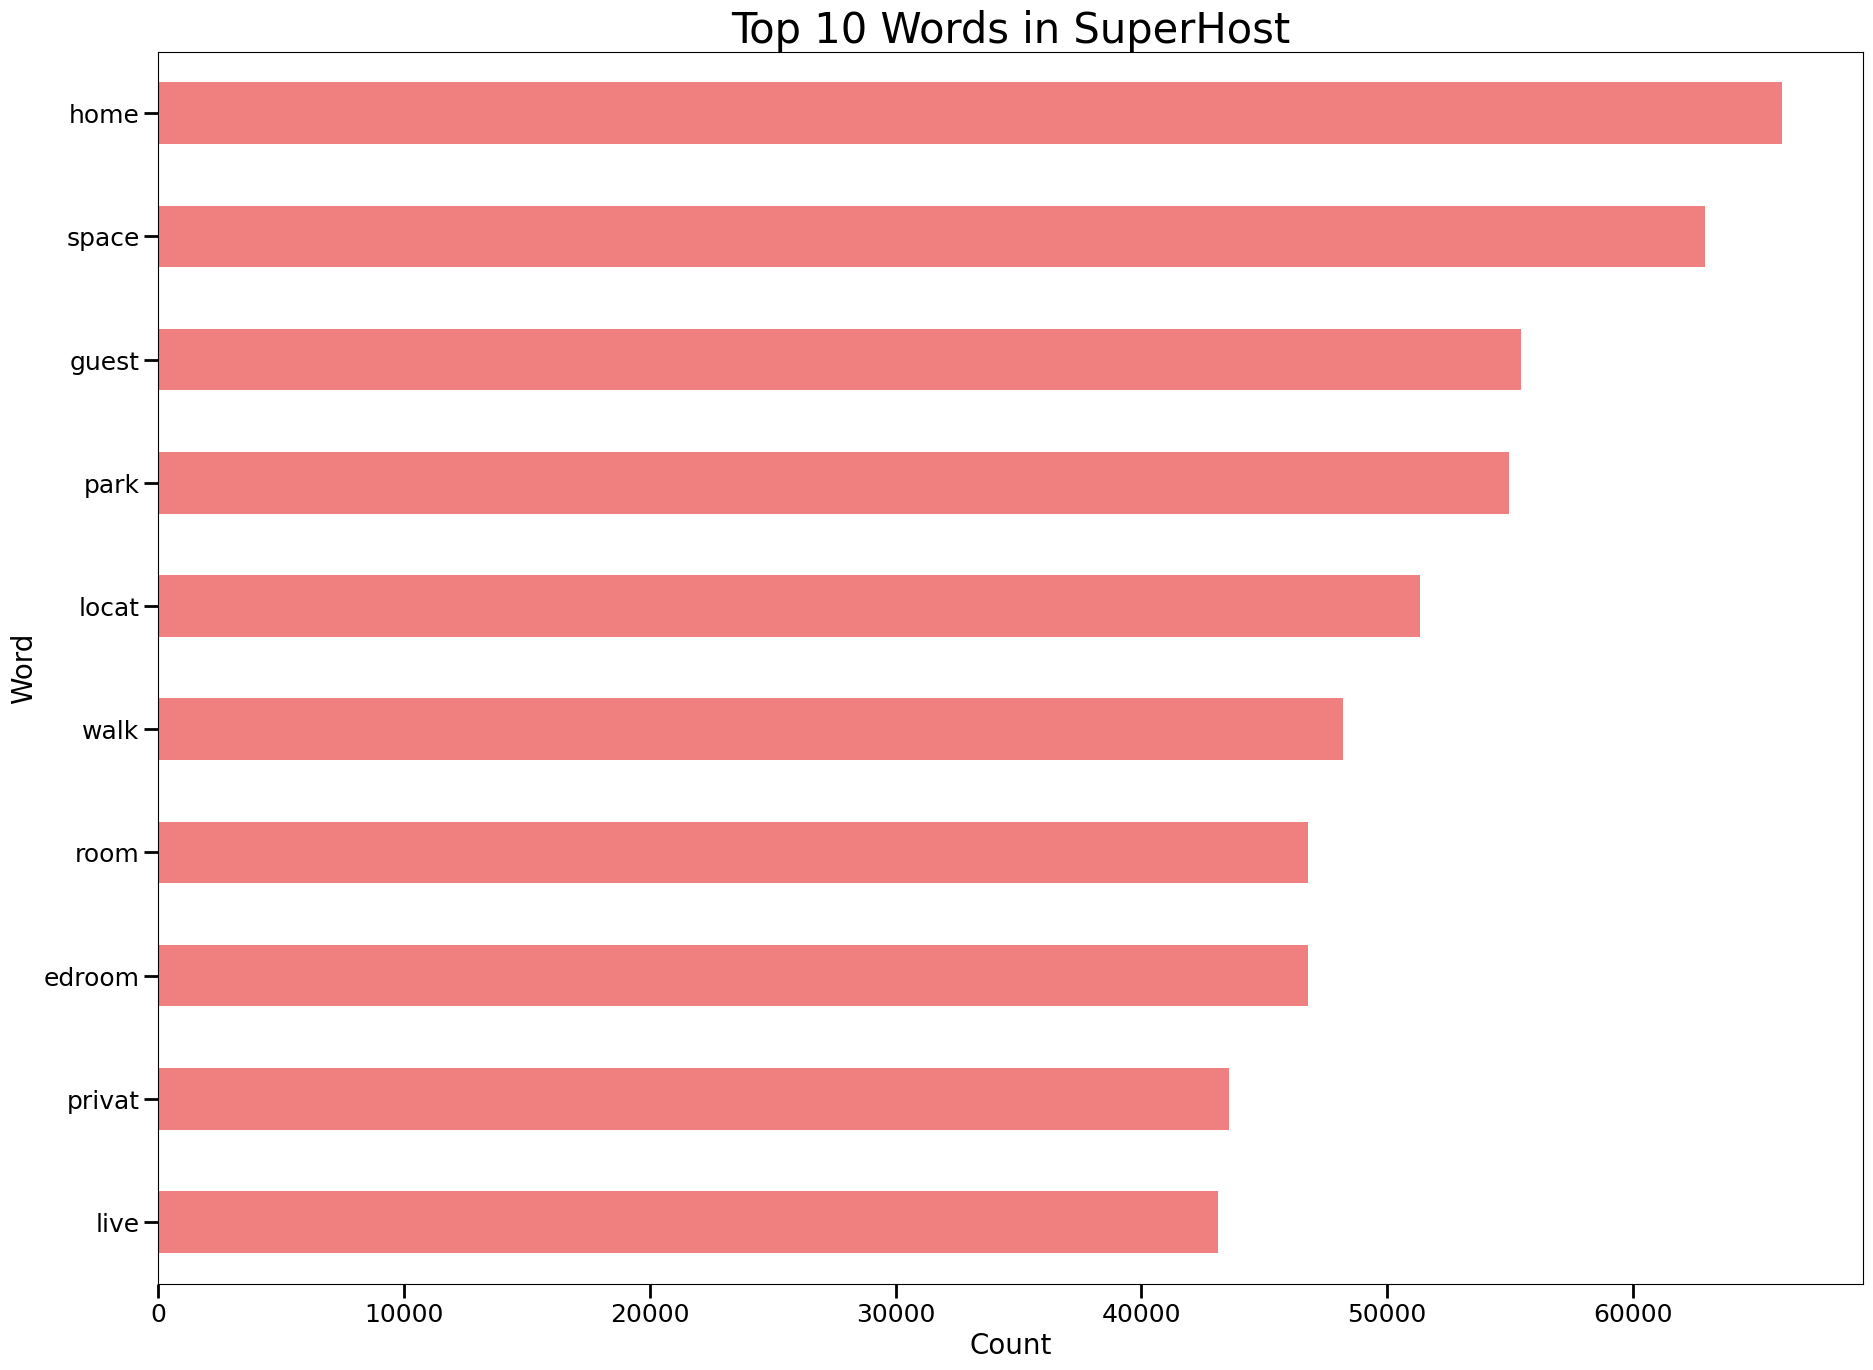

In [ ]:
word_count(cvec_sh_count_df,title='Top 10 Words in SuperHost')

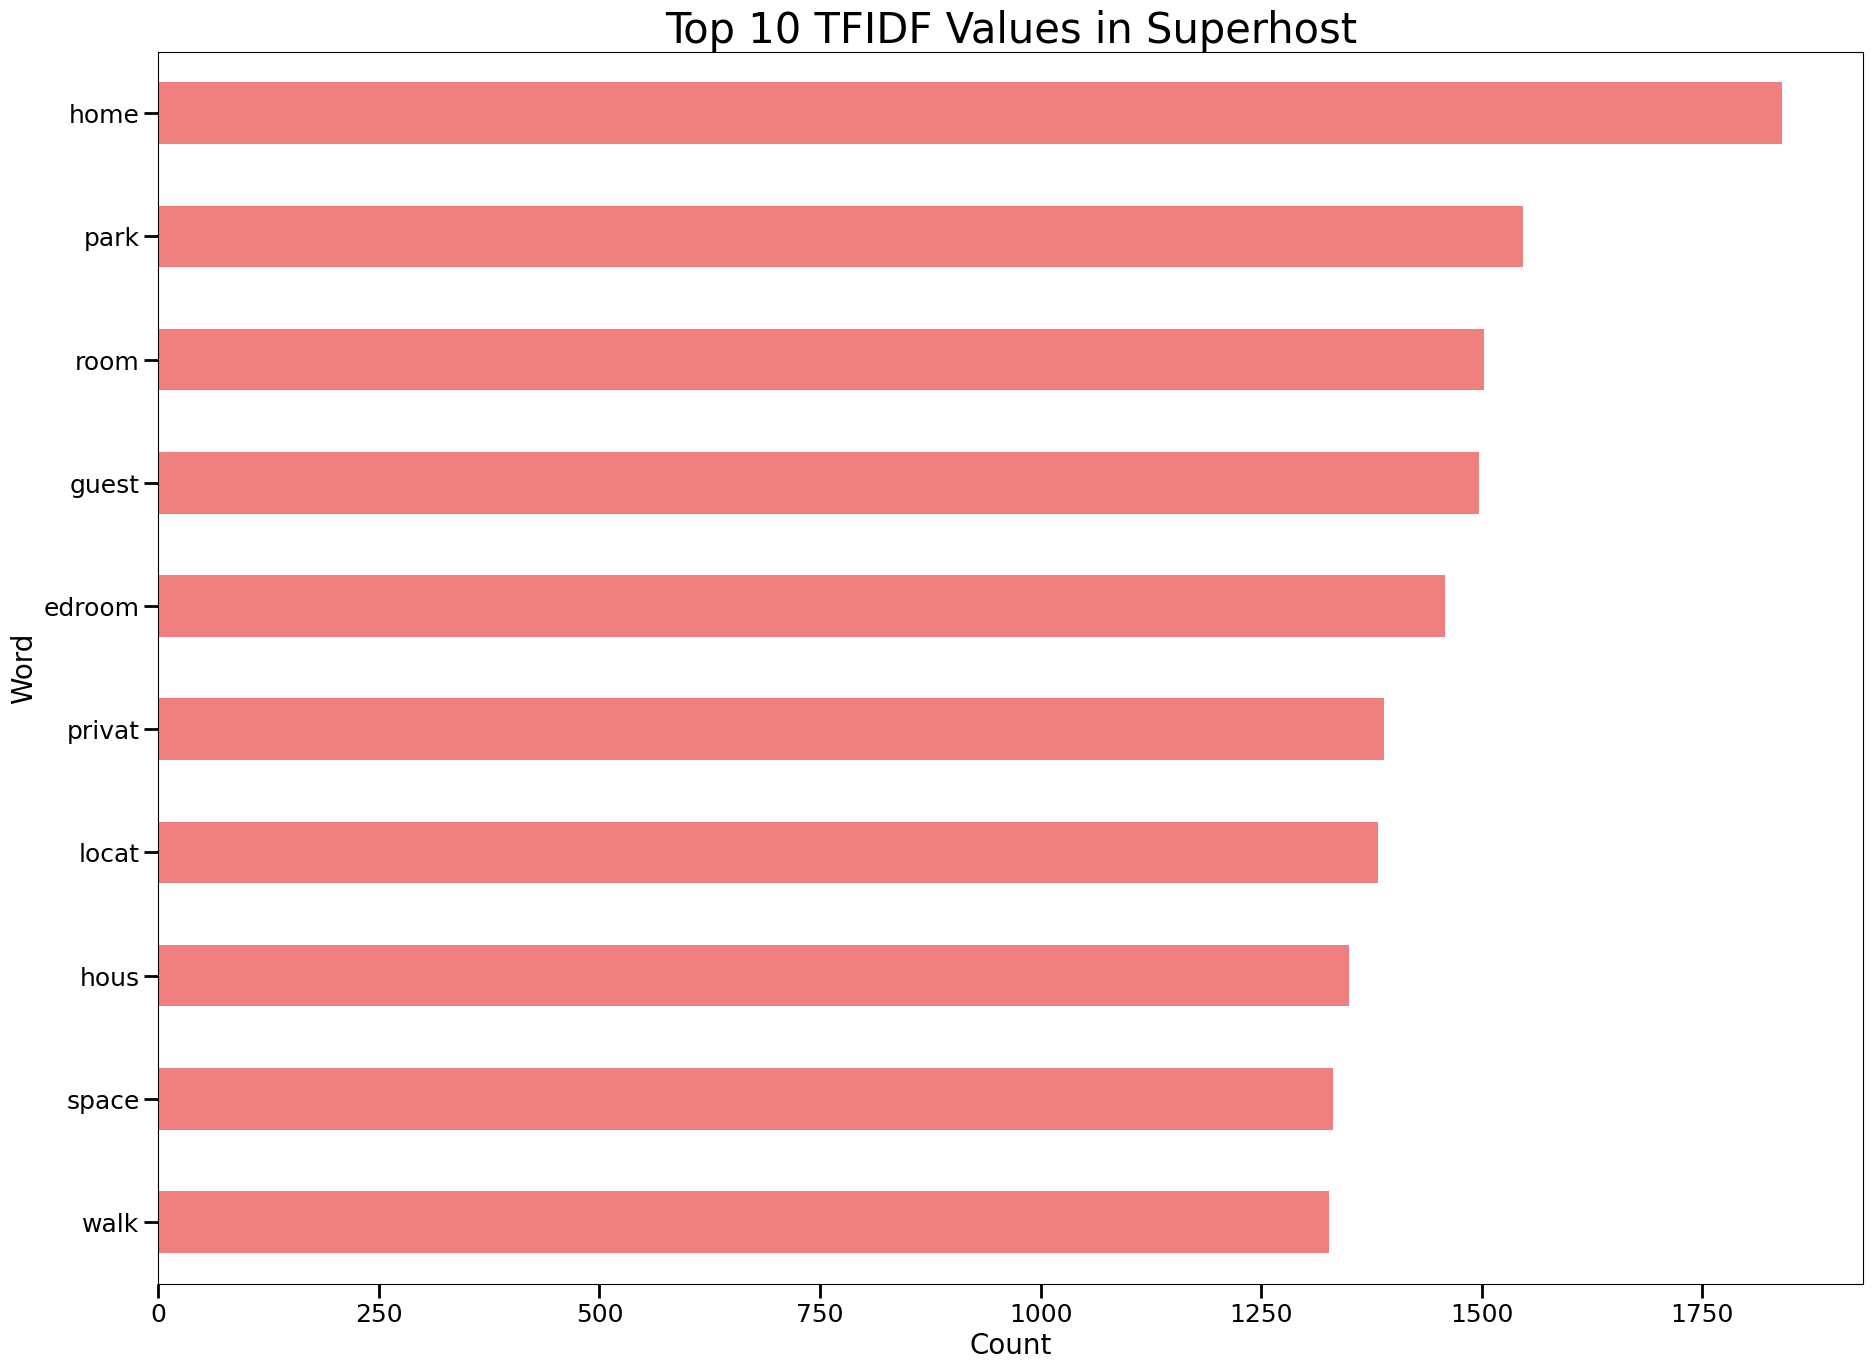

In [ ]:
word_count(tvec_sh_count_df,title='Top 10 TFIDF Values in Superhost')

In [ ]:
word_count(cvec_h_count_df,title='Top 10 Words in Normal Host')

In [ ]:
word_count(tvec_h_count_df,title='Top 10 TFIDF Values in Normal Host')

## Modeling

In [ ]:
df = pd.read_csv("/content/drive/My Drive/FOCUS Team/0. Spring Classes/Machine Learning 2/ML2cleantext.csv")

<ipython-input-3-217c963225e1>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/FOCUS Team/0. Spring Classes/Machine Learning 2/ML2cleantext.csv")


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [ ]:
df = df.dropna()

In [ ]:
X = df[['no_br']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
clean_text_train=[]
clean_text_test=[]

for text in X_train['no_br']:
    clean_text_train.append(text)
    

for text in X_test['no_br']:
    clean_text_test.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvec = CountVectorizer(stop_words='english')
tvec = TfidfVectorizer(stop_words='english')

In [ ]:
cvec_train_data_features = cvec.fit_transform(clean_text_train)
cvec_test_data_features = cvec.transform(clean_text_test)

In [ ]:
print('CVEC Train Data Shape',cvec_train_data_features.shape)
print('CVEC Test Data Shape',cvec_test_data_features.shape)

CVEC Train Data Shape (104964, 51475)
CVEC Test Data Shape (26242, 51475)


In [ ]:
tvec_train_data_features = tvec.fit_transform(clean_text_train)
tvec_test_data_features = tvec.transform(clean_text_test)

In [ ]:
print('TVEC Train Data Shape',tvec_train_data_features.shape)
print('TVEC Test Data Shape',tvec_test_data_features.shape)

TVEC Train Data Shape (104964, 51475)
TVEC Test Data Shape (26242, 51475)


In [ ]:
def metrics_eval(y_test,prediction):
  accuracy = accuracy_score(y_test,prediction)
  precision = precision_score(y_test,prediction)
  recall = recall_score(y_test,prediction)
  f1 = f1_score(y_test,prediction)
  print("Accuracy: {:.2f}".format(accuracy))
  print("Precision: {:.2f}".format(precision))
  print("Recall: {:.2f}".format(recall))
  print("F1 score: {:.2f}".format(f1))

### Base Model

#### Logistic Model

In [ ]:
#cvec
log = LogisticRegression(solver = 'lbfgs')
log.fit(cvec_train_data_features, y_train)

predict_cvec_log = log.predict(cvec_test_data_features)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
metrics_eval(y_test, predict_cvec_log)

Accuracy: 0.76
Precision: 0.69
Recall: 0.56
F1 score: 0.62


In [ ]:
#tvec
log = LogisticRegression(solver = 'lbfgs')
log.fit(tvec_train_data_features, y_train)

predict_tvec_log = log.predict(tvec_test_data_features)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
metrics_eval(y_test, predict_tvec_log)

Accuracy: 0.76
Precision: 0.69
Recall: 0.53
F1 score: 0.60


#### Decision Tree

In [ ]:
#cvec
tree = DecisionTreeClassifier()
tree.fit(cvec_train_data_features, y_train)

predict_cvec_tree = tree.predict(cvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_cvec_tree)

Accuracy: 0.74
Precision: 0.63
Recall: 0.61
F1 score: 0.62


In [ ]:
#tvec
tree = DecisionTreeClassifier()
tree.fit(tvec_train_data_features, y_train)

predict_tvec_tree = tree.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_tvec_tree)

Accuracy: 0.72
Precision: 0.60
Recall: 0.60
F1 score: 0.60


#### Naive Bayes

In [ ]:
#cvec
nb = MultinomialNB()
nb.fit(cvec_train_data_features, y_train)

predict_cvec_nb = nb.predict(cvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_cvec_nb)

Accuracy: 0.67
Precision: 0.51
Recall: 0.74
F1 score: 0.61


In [ ]:
#tvec
nb = MultinomialNB()
nb.fit(tvec_train_data_features, y_train)

predict_tvec_nb = nb.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_tvec_nb)

Accuracy: 0.70
Precision: 0.74
Recall: 0.21
F1 score: 0.33


#### KNN

In [ ]:
#cvec
knn = KNeighborsClassifier()
knn.fit(cvec_train_data_features, y_train)

predict_cvec_knn = knn.predict(cvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_cvec_knn)

Accuracy: 0.76
Precision: 0.84
Recall: 0.38
F1 score: 0.53


In [ ]:
#tvec
knn = KNeighborsClassifier()
knn.fit(tvec_train_data_features, y_train)

predict_tvec_knn = knn.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_tvec_knn)

### Ensemble Methods

#### CatBoost

In [ ]:
#! pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()
cb.fit(cvec_train_data_features, y_train)

predict_cvec_cb = cb.predict(cvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_cvec_cb)

Accuracy: 0.78
Precision: 0.76
Recall: 0.54
F1 score: 0.63


In [ ]:
cb = CatBoostClassifier()
cb.fit(tvec_train_data_features, y_train)

predict_tvec_cb = cb.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_tvec_cb)

Accuracy: 0.78
Precision: 0.74
Recall: 0.54
F1 score: 0.62


#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(cvec_train_data_features, y_train)

predict_cvec_rf = rf.predict(cvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_cvec_rf)

Accuracy: 0.79
Precision: 0.89
Recall: 0.45
F1 score: 0.60


In [ ]:
rf = RandomForestClassifier()
rf.fit(tvec_train_data_features, y_train)

predict_tvec_rf = rf.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_tvec_rf)

Accuracy: 0.78
Precision: 0.90
Recall: 0.42
F1 score: 0.57


In [ ]:
print(classification_report(y_test, predict_tvec_rf))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85     17123
           1       0.90      0.42      0.57      9119

    accuracy                           0.78     26242
   macro avg       0.83      0.70      0.71     26242
weighted avg       0.81      0.78      0.76     26242



## Hyperparameter Tuning 

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
rf_param = {
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [100, 200, 300],
    'max_depth': [5,10,15,20],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10,20,30]
}

Accuracy

In [ ]:
grid_search_accuracy = GridSearchCV(rf, rf_param, scoring = "accuracy")

In [ ]:
grid_search_accuracy.fit(tvec_train_data_features, y_train)

In [ ]:
grid_search_accuracy.best_params_

In [ ]:
predict_grid_search_accuracy = grid_search_accuracy.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_grid_search_accuracy)

In [ ]:
print(classification_report(y_test, predict_grid_search_accuracy))

Precision

In [ ]:
grid_search_precision = GridSearchCV(rf, rf_param, scoring = "precision")

In [ ]:
grid_search_precision.fit(tvec_train_data_features, y_train)

In [ ]:
grid_search_precision.best_params_

In [ ]:
predict_grid_search_precision = grid_search_accuracy.predict(tvec_test_data_features)

In [ ]:
metrics_eval(y_test, predict_grid_search_precision)

In [ ]:
print(classification_report(y_test, predict_grid_search_precision))

## Best Model Evaluation

- Random Forest Classifier with TfidfVectorizer Data

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, predict_tvec_rf)

In [ ]:
print(cm)

[[16721   402]
 [ 5300  3819]]


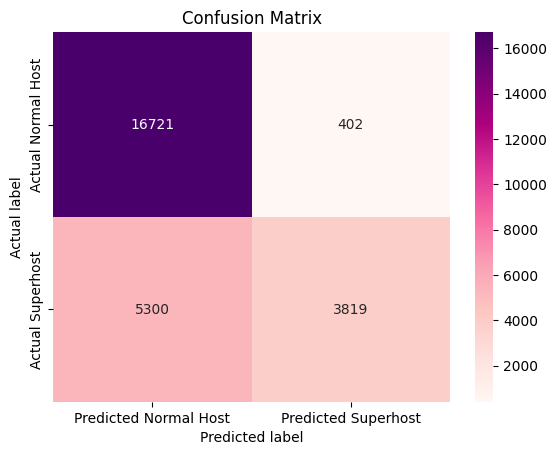

In [ ]:
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g', xticklabels=['Predicted Normal Host', 'Predicted Superhost'], yticklabels=['Actual Normal Host', 'Actual Superhost'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

AUC and ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
auc_score = roc_auc_score(y_test, predict_tvec_rf)
print("AUC Score:", auc_score)

AUC Score: 0.6976593630942316


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predict_tvec_rf)

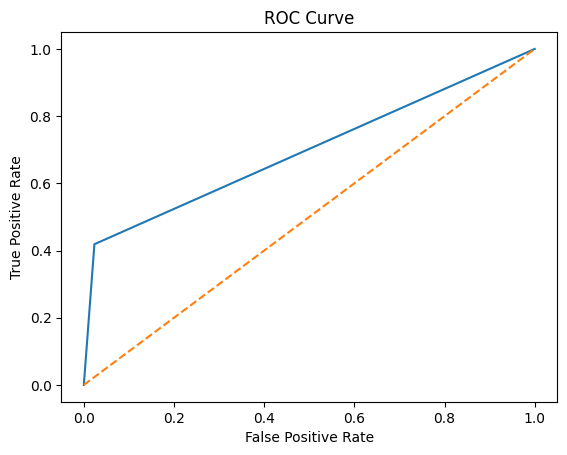

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
test_probs = rf.predict_proba(tvec_test_data_features)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

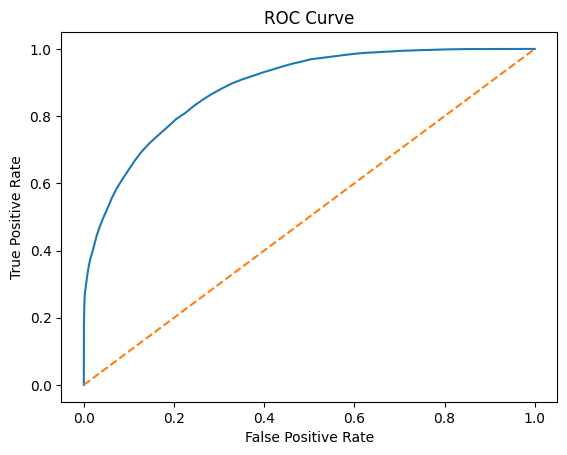

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Feature Important

In [ ]:
importances = rf.feature_importances_

In [ ]:
indices = importances.argsort()[::-1]

In [ ]:
top_n = 10
feature_names = tvec.get_feature_names_out()
for i in range(top_n):
    print(feature_names[indices[i]], importances[indices[i]])

space 0.0045106042021051075
love 0.003463929967685157
edroom 0.0033231732026380977
guest 0.0032967036934526996
neighorhood 0.003194074756904021
travel 0.0031629484516844473
privat 0.0031314783231607465
quiet 0.0030598648400819444
park 0.003016939398151577
locat 0.0029707817897198408


In [ ]:
importance_dict = dict(zip(feature_names, importances))

In [ ]:
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

In [ ]:
top_words = list(sorted_importance_dict.keys())[:10]
top_importances = list(sorted_importance_dict.values())[:10]

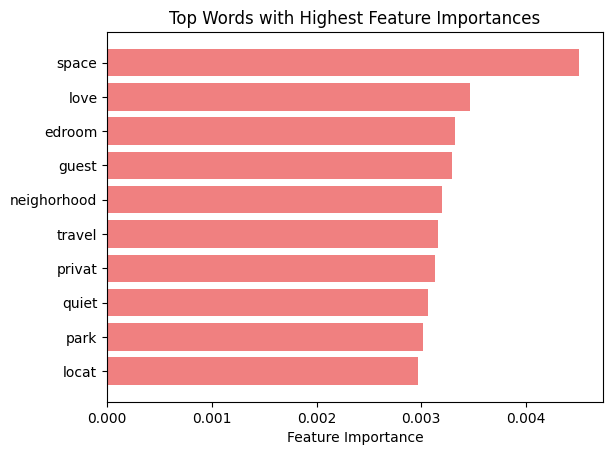

In [ ]:
plt.barh(np.arange(len(top_words)), top_importances[::-1], align='center',color='lightcoral')
plt.yticks(np.arange(len(top_words)), top_words[::-1])
plt.xlabel('Feature Importance')
plt.title('Top Words with Highest Feature Importances')
plt.show()

## Getting Data for Stacking Model

 train_target, train_pred, train_pred_prob

In [ ]:
#train target
train_target = y_train
train_target

68738     0
10189     1
27896     1
94779     1
122074    0
         ..
54982     0
110444    1
120055    0
103870    1
122134    0
Name: target, Length: 104964, dtype: int64

In [ ]:
train_preds = rf.predict(tvec_train_data_features)
train_preds

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
#train_pred_prob
train_probs = rf.predict_proba(tvec_train_data_features)[:, 1]
print("Training set probabilities:")
print(train_probs)

Training set probabilities:
[0.12 0.85 0.95 ... 0.11 0.77 0.12]


In [ ]:
train_df = pd.DataFrame(y_train)

In [ ]:
train_df['train_preds'] = train_preds

In [ ]:
train_df['train_probs'] = train_probs

In [ ]:
train_df

,target,train_preds,train_probs
68738,0,0,0.12
10189,1,1,0.85
27896,1,1,0.95
94779,1,1,0.87
122074,0,0,0.13
...,...,...,...
54982,0,0,0.07
110444,1,1,0.81
120055,0,0,0.11
103870,1,1,0.77


test_target, test_pred, test_pred_prob

In [ ]:
#test_target
y_test

41075    1
57612    1
11897    0
63122    1
18331    0
        ..
96868    1
92065    0
96407    0
26137    0
67530    0
Name: target, Length: 26242, dtype: int64

In [ ]:
test_preds = rf.predict(tvec_test_data_features)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#test_pred_prob
test_probs = rf.predict_proba(tvec_test_data_features)[:, 1]
print("Test set probabilities:")
print(test_probs)

Test set probabilities:
[0.42 0.4  0.43 ... 0.41 0.02 0.05]


In [ ]:
test_df = pd.DataFrame(y_test)

In [ ]:
test_df['test_preds'] = test_preds

In [ ]:
test_df['test_probs'] = test_probs

In [ ]:
test_df

,target,test_preds,test_probs
41075,1,0,0.42
57612,1,0,0.40
11897,0,0,0.43
63122,1,1,0.78
18331,0,0,0.11
...,...,...,...
96868,1,1,0.59
92065,0,0,0.37
96407,0,0,0.41
26137,0,0,0.02


Make the Table

In [ ]:
raw_df = pd.read_csv("/content/drive/My Drive/FOCUS Team/0. Spring Classes/Machine Learning 2/ML2textdata.csv")

<ipython-input-136-ab0346522232>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("/content/drive/My Drive/FOCUS Team/0. Spring Classes/Machine Learning 2/ML2textdata.csv")


In [ ]:
id = pd.DataFrame(raw_df['id'])

In [ ]:
new_train = pd.concat([id, train_df], axis=1, join='inner')

In [ ]:
new_train

,id,target,train_preds,train_probs
1,11869,0,0,0.15
2,11879,0,0,0.10
3,24548,1,1,0.85
5,43785,1,1,0.80
6,54948,1,1,0.93
...,...,...,...,...
131380,552360167157570264,0,0,0.00
131381,47188167,0,0,0.22
131382,34755131,0,0,0.10
131385,49692446,0,0,0.09


In [ ]:
new_test = pd.concat([id, test_df], axis=1, join='inner')

In [ ]:
new_test

,id,target,test_preds,test_probs
0,8357,1,1,0.53
4,31721,0,0,0.48
31,744215,1,0,0.38
33,769642,1,0,0.41
35,803241,0,1,0.56
...,...,...,...,...
131376,52660159,1,0,0.48
131379,53733994,0,0,0.07
131383,16733665,1,1,0.56
131384,25846790,0,0,0.46


In [ ]:
new_train.to_csv('/content/drive/My Drive/new_train.csv', index=False)

In [ ]:
new_test.to_csv('/content/drive/My Drive/new_test.csv', index=False)